**Q-LEARNING AGENT**

**AIM:** To write a python program to implement Q-Learning agent with episodic experience to find an optimal policy for the Classroom

**IMPLEMENTATION:**

In [ ]:
!pip install gym

In [ ]:
import gym 
import itertools 
import matplotlib 
import matplotlib.style 
import numpy as np 
import pandas as pd 
import sys 
  
  
from collections import defaultdict 
from windy_gridworld import WindyGridworldEnv 
import plotting 
  
matplotlib.style.use('ggplot') 

In [ ]:
env = WindyGridworldEnv() 

In [ ]:
def createEpsilonGreedyPolicy(Q, epsilon, num_actions): 
	
	def policyFunction(state): 

		Action_probabilities = np.ones(num_actions, 
				dtype = float) * epsilon / num_actions 
				
		best_action = np.argmax(Q[state]) 
		Action_probabilities[best_action] += (1.0 - epsilon) 
		return Action_probabilities 

	return policyFunction 

In [ ]:
def qLearning(env, num_episodes, discount_factor = 1.0, 
							alpha = 0.6, epsilon = 0.1): 
	
	
	
	Q = defaultdict(lambda: np.zeros(env.action_space.n)) 

	
	stats = plotting.EpisodeStats( 
		episode_lengths = np.zeros(num_episodes), 
		episode_rewards = np.zeros(num_episodes))	 
	
	
	policy = createEpsilonGreedyPolicy(Q, epsilon, env.action_space.n) 
	
	
	for ith_episode in range(num_episodes): 
		
		
		state = env.reset() 
		
		for t in itertools.count(): 
			
			
			action_probabilities = policy(state) 

			
			action = np.random.choice(np.arange( 
					len(action_probabilities)), 
					p = action_probabilities) 

			
			next_state, reward, done, _ = env.step(action) 

			
			stats.episode_rewards[ith_episode] += reward 
			stats.episode_lengths[ith_episode] = t 
			
			
			best_next_action = np.argmax(Q[next_state])	 
			td_target = reward + discount_factor * Q[next_state][best_next_action] 
			td_delta = td_target - Q[state][action] 
			Q[state][action] += alpha * td_delta 

			
			if done: 
				break
				
			state = next_state 
	
	return Q, stats 


In [ ]:
Q, stats = qLearning(env, 1000) 


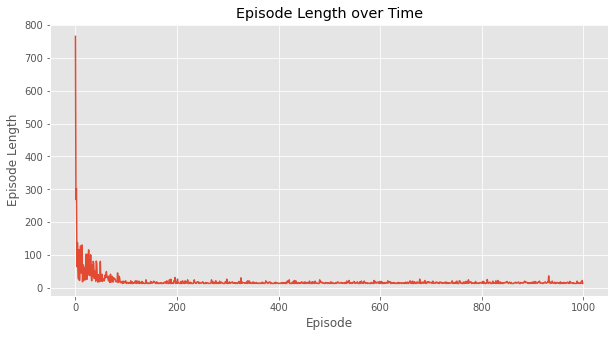

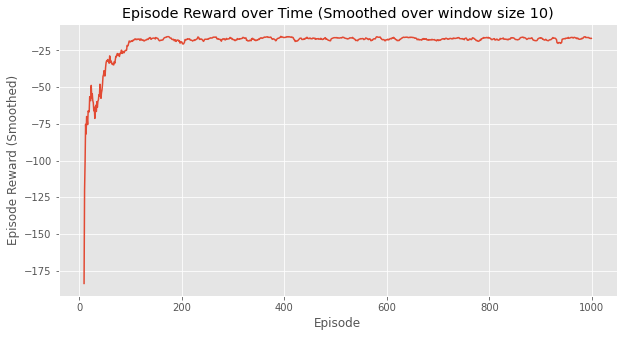

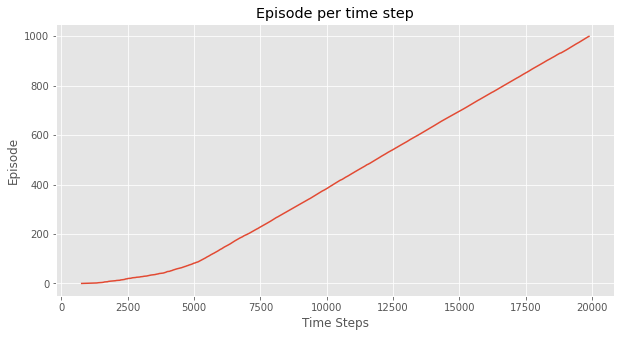

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [ ]:
plotting.plot_episode_stats(stats) 
